#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Elber Aguilar Pérez - A01793568
* Jose Francisco Muñoz Del Angel - A01794174  
* Daniel Roberto Meneses León - A01794274
* David Mireles Samaniego - A01302935 


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn import svm

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_roc_curve, recall_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay  
from sklearn import metrics


from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, learning_curve, validation_curve 
from sklearn.metrics import fbeta_score, make_scorer

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

#**Ejercicio-1.** 

In [ ]:
column_names = ["A1", "A2","A3","A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]

file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'
df = pd.read_csv(mypath, sep=" ", header=None, names=column_names)
df = pd.DataFrame(df)
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
# Split data into train and test sets

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

print(X_train.shape, ': dimensión de datos de entrada para entrenamiento')
print(X_test.shape, ': dimensión de datos de entrada para prueba')  

print(y_train.shape, ': dimensión de variable de salida para entrenamiento')
print(y_test.shape, ': dimensión de variable de salida para prueba')


(586, 14) : dimensión de datos de entrada para entrenamiento
(104, 14) : dimensión de datos de entrada para prueba
(586,) : dimensión de variable de salida para entrenamiento
(104,) : dimensión de variable de salida para prueba


In [ ]:
y

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: A15, Length: 690, dtype: int64

#**Ejercicio-2.**

In [ ]:
# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = ['A2','A3','A7','A10','A13','A14']

numeric_transformer = Pipeline(steps=[('impmedian', SimpleImputer(strategy='median')),
                                      ('scaler', MinMaxScaler(feature_range=(1,2)))])

categorical_features = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

categorical_transformer = Pipeline(steps=[('impModa', SimpleImputer(strategy='most_frequent'))])

categorical_features_ohe = ['A4','A5','A6','A12']

categorical_transformer_ohe = Pipeline(steps=[('onehote', OneHotEncoder(handle_unknown= 'ignore'))])

columnTransformer = ColumnTransformer(transformers=[('numeric', numeric_transformer, numeric_features),
                                                    ('categorical', categorical_transformer, categorical_features),
                                                    ('carohe', categorical_transformer_ohe, categorical_features_ohe)],
                                     remainder='passthrough')



#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar
la estrategia “stratified” en este caso?

In [ ]:

model = DummyClassifier(strategy='stratified') # Modelo Dummy

pipeline = Pipeline(steps=[('preprocessor', columnTransformer),
                            ('model', model)])


pipe_dummy = pipeline.fit(X_train, y_train)

y_prediction = pipe_dummy.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_prediction)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_prediction,zero_division=0)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_prediction)))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_prediction)))
print(classification_report(y_test, y_prediction, target_names=['False', 'True'],zero_division=0))



Accuracy: 0.54
Precision: 0.48
Recall: 0.59
F1-score: 0.53
              precision    recall  f1-score   support

       False       0.60      0.50      0.55        58
        True       0.48      0.59      0.53        46

    accuracy                           0.54       104
   macro avg       0.54      0.54      0.54       104
weighted avg       0.55      0.54      0.54       104



## Conclusiones

Utilizamos `DummyClassifier` con la estrategia de `Stratified` debido al tipo aleatorio de muestras utilizando el vector de tipo OneHot para distribuciones multinomiales para el tipo especifico de DataFrame que se maneja para este caso, ya que tenemos un gran numero de parametros.

Para este ejercicio se generó un modelo de predicción `Dummy`. Se emplea la función `Stratified` para poder realizar un muestreo en donde se divide la población en grupos mas pequeños. Esta función genera una estrategia que genera aleatoriamente y así poder ayudarnos a entender la relación que existen entre estos subgrupos. 

#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio
anterior.

In [ ]:
resultados_svc = list() # Almacenamos los resultados de las metricas 
resultados_grid = list()
# Definimos los parámetros a optimizar
#svm_params = [{'modelo__kernel':['poly', 'rbf', 'sigmoid', 'linear'],
#             'modelo__C':[0.1,1.0], ## np.logspace(-5, 5, 100) # generamos 100 valores para C, se dejan solo 3 por el momento para ahorrar computo
#             'modelo__degree':[2,3,4],
#             'modelo__class_weight':['balanced', None],
#             'modelo__gamma':[1,0.1,0.01] ## np.logspace(-5, 5, 100)
#                          }]

svm_params = {'modelo__C': [0.1, 1, 10, 100, 1000], 
              'modelo__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'modelo__kernel': ['poly', 'rbf', 'sigmoid', 'linear']}

metricas =['accuracy', 'f1', 'precision', 'recall']

for metrica in metricas:
    
    modelo_svc = svm.SVC()

    pipeline_svc = Pipeline(steps=[('processor', columnTransformer),
                               ('modelo', modelo_svc)])


    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    search = GridSearchCV(estimator = pipeline_svc, 
                      param_grid = svm_params, 
                      cv = kfold,
                      scoring= metrica,
                      n_jobs = -1)

    search.fit(X_train, y_train)
    
    resultados_svc.append(search.best_estimator_)
    resultados_grid.append(search.best_params_)
    
    print('Los mejores hiperparametros con la metrica de :',metrica, " son:")
    print('Mejor valor de exactitud obtenido con la mejor combinación:', search.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', search.best_params_, "\n")
    

#resultados.append(resultadoDummy)

#Se imprimen todas las métricas para datos de Entrenamiento y Prueba


Los mejores hiperparametros con la metrica de : accuracy  son:
Mejor valor de exactitud obtenido con la mejor combinación: 0.8543773238688495
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 10, 'modelo__gamma': 0.001, 'modelo__kernel': 'rbf'} 

Los mejores hiperparametros con la metrica de : f1  son:
Mejor valor de exactitud obtenido con la mejor combinación: 0.8502332606337628
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 10, 'modelo__gamma': 0.001, 'modelo__kernel': 'rbf'} 



/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages

/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages

  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages

  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

Los mejores hiperparametros con la metrica de : precision  son:
Mejor valor de exactitud obtenido con la mejor combinación: 0.8720063747263896
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 0.1, 'modelo__gamma': 0.01, 'modelo__kernel': 'poly'} 

Los mejores hiperparametros con la metrica de : recall  son:
Mejor valor de exactitud obtenido con la mejor combinación: 0.9348089017900337
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 0.1, 'modelo__gamma': 1, 'modelo__kernel': 'linear'} 



In [ ]:
resultados_grid

[{'modelo__C': 10, 'modelo__gamma': 0.001, 'modelo__kernel': 'rbf'},
 {'modelo__C': 10, 'modelo__gamma': 0.001, 'modelo__kernel': 'rbf'},
 {'modelo__C': 0.1, 'modelo__gamma': 0.01, 'modelo__kernel': 'poly'},
 {'modelo__C': 0.1, 'modelo__gamma': 1, 'modelo__kernel': 'linear'}]

In [ ]:
metricas =['accuracy', 'f1', 'precision', 'recall']

for i in range(len(resultados_grid)):
    modelo = svm.SVC(C=resultados_grid[i]['modelo__C'],
                     gamma=resultados_grid[i]['modelo__gamma'],
                     kernel=resultados_grid[i]['modelo__kernel']
                    )
    print(modelo)
    pipeline_ = Pipeline(steps=[('processor', columnTransformer),
                                   ('modelo', modelo)])


    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    for metrica in metricas:

        resul_cross_val = cross_validate(pipeline_,
                                         X_train, y_train,
                                         scoring=metricas,
                                         cv=kfold,
                                         return_train_score=True)

SVC(C=10, gamma=0.001) recall
SVC(C=10, gamma=0.001) recall
SVC(C=0.1, gamma=0.01, kernel='poly') recall
SVC(C=0.1, gamma=1, kernel='linear') recall


In [ ]:
resul_cross_val

{'fit_time': array([0.01426506, 0.01098824, 0.0117209 , 0.01039004, 0.01573205,
        0.01119208, 0.01108384, 0.01275396, 0.01122785, 0.01539683,
        0.01204777, 0.00999022, 0.01372004, 0.01373219, 0.01285005]),
 'score_time': array([0.004776  , 0.00470805, 0.0047791 , 0.00465798, 0.00488496,
        0.0048871 , 0.00469494, 0.00515103, 0.00499392, 0.00500989,
        0.00469923, 0.00466299, 0.00477099, 0.00472283, 0.00471187]),
 'test_accuracy': array([0.86440678, 0.83760684, 0.87179487, 0.83760684, 0.83760684,
        0.86440678, 0.82051282, 0.83760684, 0.88034188, 0.84615385,
        0.83898305, 0.87179487, 0.88034188, 0.82051282, 0.83760684]),
 'train_accuracy': array([0.8482906 , 0.85287846, 0.84434968, 0.85287846, 0.85501066,
        0.84615385, 0.85714286, 0.85287846, 0.84221748, 0.85074627,
        0.8525641 , 0.84648188, 0.84221748, 0.85714286, 0.85287846]),
 'test_f1': array([0.86666667, 0.83478261, 0.86486486, 0.82882883, 0.84033613,
        0.86206897, 0.81415929, 0.83

#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas.
Incluye tus conclusiones.

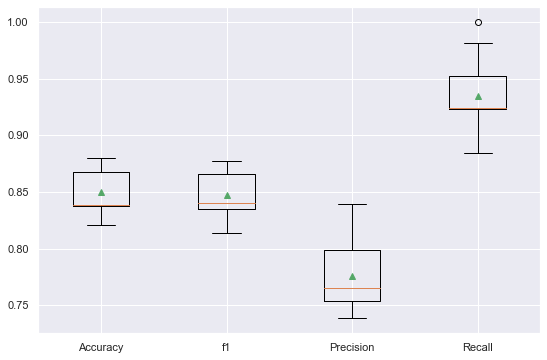

In [ ]:
sns.set(rc={'figure.figsize':(9,6)})

list_test = list()
list_test.append(resul_cross_val['test_accuracy'])
list_test.append(resul_cross_val['test_f1'])
list_test.append(resul_cross_val['test_precision'])
list_test.append(resul_cross_val['test_recall'])


nombres = ['Accuracy', 'f1', 'Precision','Recall']

plt.boxplot(list_test, labels=nombres, showmeans=True)

plt.show()

### Conclusiones 

- Si nuestro enfoque fuese solo reducir los Falsos Negativos sobre el modelo la mejor metrica en este caso sería sin duda alguna Recall.

- Tanto el accuracy del modelo como f1-score nos hacen ver que el modelo es bueno pero se pueden mejorar los resultados, si las comparamos con la exactitud obtenida con recall.


#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento,
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno
de estos problemas.

In [ ]:
# Funciones learning_curve, validation_curve

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('metrica')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

    
def mi_ModeloYCurvas(modelo, Xin, ytv):
         
    modelo = modelo

    pipeline_ = Pipeline(steps=[('processor', columnTransformer),
                                   ('modelo', modelo)])


    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    delta_train_sz = np.linspace(0.1, 1.0, 50) 
        
    #metricas =['accuracy', 'f1', 'precision', 'recall']
        
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline_,    
                                                         X = Xin,
                                                         y = ytv,
                                                         cv = kfold,
                                                         train_sizes = delta_train_sz,
                                                         random_state=11)

           # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
           ######################################################################


           # Obtenemos el gráfico con las curvas de aprendizaje:
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

SVC(C=10, gamma=0.001)


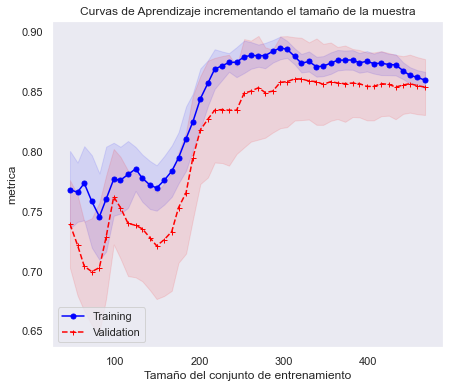

SVC(C=10, gamma=0.001)


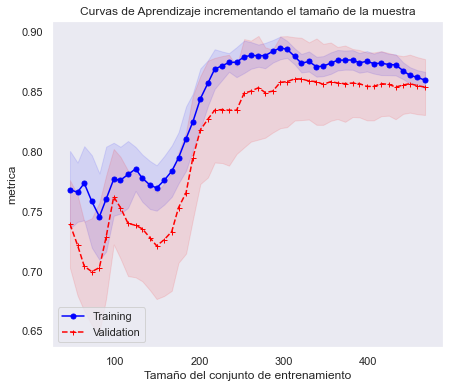

SVC(C=0.1, gamma=0.01, kernel='poly')


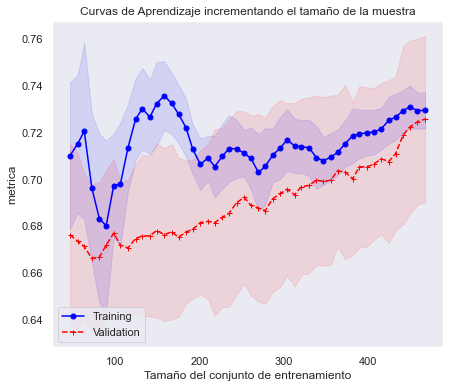

SVC(C=0.1, gamma=1, kernel='linear')


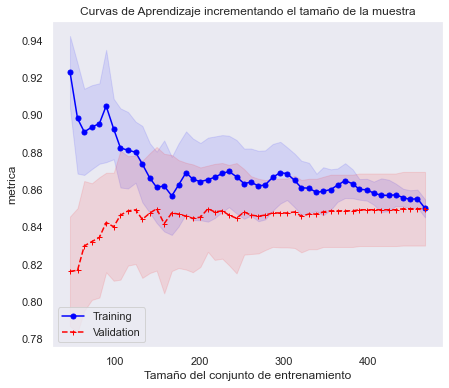

In [ ]:
metricas =['accuracy', 'f1', 'precision', 'recall']

for i in range(len(resultados_grid)):
    modelo = svm.SVC(C=resultados_grid[i]['modelo__C'],
                     gamma=resultados_grid[i]['modelo__gamma'],
                     kernel=resultados_grid[i]['modelo__kernel']
                    )
    print(modelo)
    
    mi_ModeloYCurvas(modelo, X_train, y_train)


#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la
curva.

In [ ]:
y_test

14     0
586    0
140    0
492    0
350    1
      ..
346    1
310    0
202    1
332    1
532    0
Name: A15, Length: 104, dtype: int64

In [ ]:
my0s = (y_test==0)   # Se genera el vector Booleano, my0s, con TRUE para las entradas con 0s y FALSE para los 1s. Buscamos quedarnos solo con los negativos.
my1s = (y_test==1)

print(my0s.shape)
print(sum(my0s))   # ambos suman el total del Test set.
print(sum(my1s))

(104,)
58
46


In [ ]:
# definimos la función para crear la curva ROC para el modelo 

# regresa los TP para un umbral deseado:

my0s = (y_test==0)   # Se genera el vector Booleano, my0s, con TRUE para las entradas con 0s y FALSE para los 1s. Buscamos quedarnos solo con los negativos.
my1s = (y_test==1)

def fun_thTPrate(th, modelo, x, y):
    p = modelo.predict_proba(x)   # shape (231x2)
    #my1s = (y['A15']==1) 
    pred1s  = p[my1s][:,1]
    return sum(pred1s > th) / sum(my1s)


# Análogo ahora con los FP:

def fun_thFPrate(th, modelo, x, y):
    p = modelo.predict_proba(x)
    #my0s = (y['A15']==0) 
    pred0s  = p[my0s][:,1]
    return sum(pred0s>th) / sum(my0s)


def fun_roc(TPrate,FPrate, modelo, x, y, rr = None):
    
    new_th = 0.5 # búsquda del mejor umbral que minimiza el total FP+FN.
    rr = 0.36   # búsqueda del mejor radio

    TPrate = fun_thTPrate(new_th, modelo, x, y)
    FPrate = fun_thFPrate(new_th, modelo, x, y)

    RocCurveDisplay.from_estimator(modelo, x, y)
    plt.plot([0,0,1,0],[0,1,1,0], 'y--')
    plt.hlines(TPrate, 0, FPrate, colors='r', linestyles='dotted')  
    plt.vlines(FPrate, 0, TPrate, colors='r', linestyles='dotted')  
    
    if radio_circulo != None:
    # graficando el pedazo de cícrulo:
        an = np.linspace(1.5*np.pi, 2*np.pi, 20)
        plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
        plt.axis('equal')
        plt.show() 


SVC(C=10, gamma=0.001, probability=True)
**********
SVC(C=10, gamma=0.001, probability=True)
**********
SVC(C=0.1, gamma=0.01, kernel='poly', probability=True)
**********
SVC(C=0.1, gamma=1, kernel='linear', probability=True)
**********


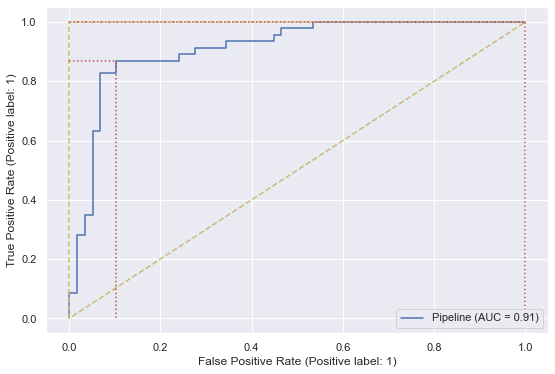

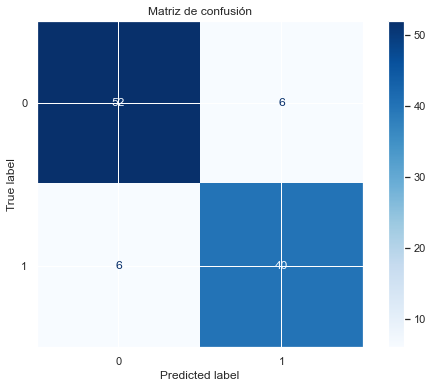

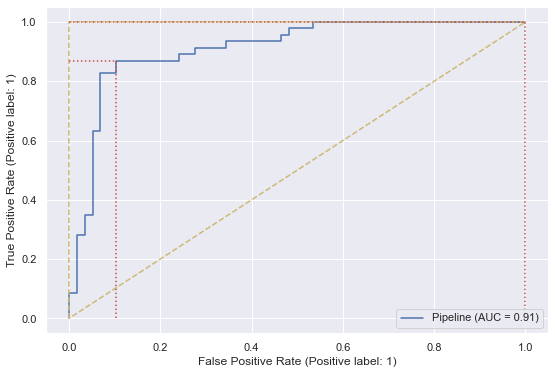

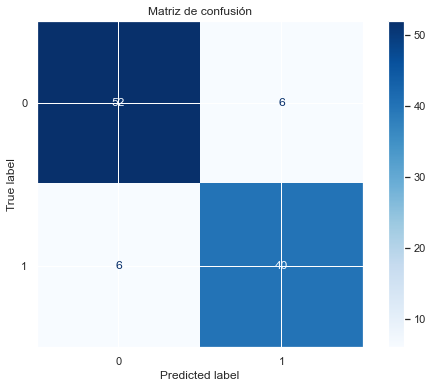

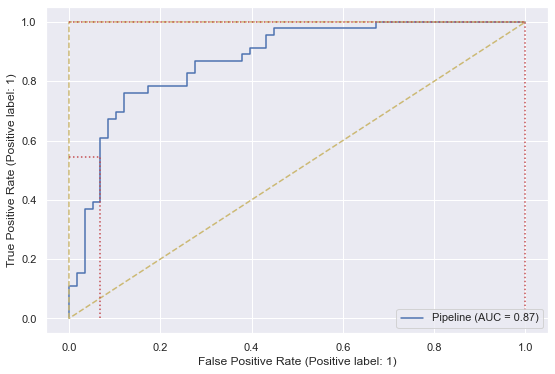

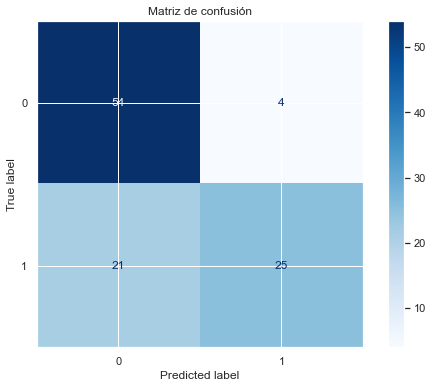

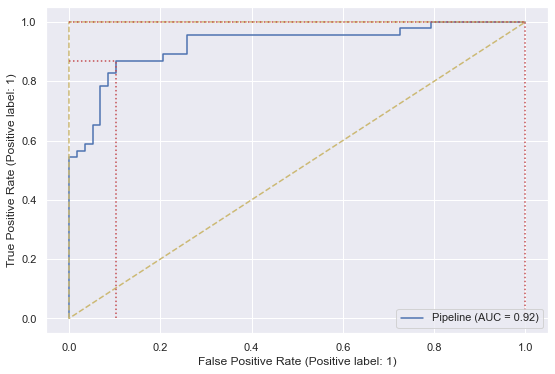

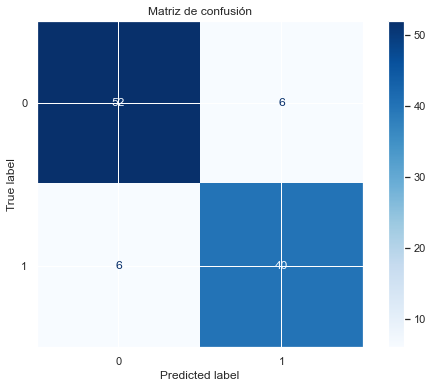

In [ ]:
for i in range(len(resultados_grid)):
    modelo = svm.SVC(C=resultados_grid[i]['modelo__C'],
                     gamma=resultados_grid[i]['modelo__gamma'],
                     kernel=resultados_grid[i]['modelo__kernel'],
                     probability=True
                    )
    print(modelo)
        
    pipeline_ = Pipeline(steps=[('processor', columnTransformer),
                                   ('modelo', modelo)])
    
    modelo_SVM = pipeline_.fit(X_train, y_train)
    
    yhat = modelo_SVM.predict(X_test)

    # Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
    fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
    svm_curve = RocCurveDisplay.from_estimator(modelo_SVM, X_test, y_test)
    plt.plot([0,0,1,0],[0,1,1,0], 'y--')
    plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
    plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
    
    print('**********')
    cmp = ConfusionMatrixDisplay.from_estimator(modelo_SVM, X_test, y_test, cmap='Blues')
    cmp.ax_.set_title('Matriz de confusión')
    #plt.axis('equal')
    #plt.show()
    
    #fun_roc(tpr, fpr, modelo_SVM, X_test, y_test)
    

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica
f1-score.

ROC - F1-Score
**********


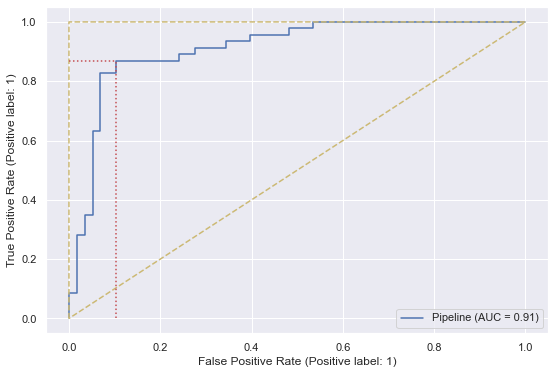

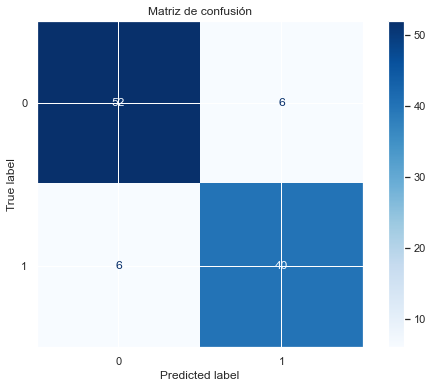

In [ ]:
for i in range(len(resultados_grid)):
    if i == 1:
        
        modelo = svm.SVC(C=resultados_grid[i]['modelo__C'],
                         gamma=resultados_grid[i]['modelo__gamma'],
                         kernel=resultados_grid[i]['modelo__kernel'],
                         probability=True
                        )
        print('ROC - F1-Score')

        pipeline_ = Pipeline(steps=[('processor', columnTransformer),
                                    ('modelo', modelo)])

        modelo_SVM = pipeline_.fit(X_train, y_train)

        yhat = modelo_SVM.predict(X_test)
        
        new_th = 0.3 # búsquda del mejor umbral que minimiza el total FP+FN.
        rr = 0.36   # búsqueda del mejor radio

        new_TPrate = fun_thTPrate(new_th, modelo_SVM, X_test, y_test)
        new_FPrate = fun_thFPrate(new_th, modelo_SVM, X_test, y_test)
        # Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
        #fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
        svm_curve = RocCurveDisplay.from_estimator(modelo_SVM, X_test, y_test)
        plt.plot([0,0,1,0],[0,1,1,0], 'y--')
        plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
        plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  # como valor predeteminado

        print('**********')
        cmp = ConfusionMatrixDisplay.from_estimator(modelo_SVM, X_test, y_test, cmap='Blues')
        cmp.ax_.set_title('Matriz de confusión')
    else:
        None

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean.

In [ ]:
# Función calcular G-Mean

def mi_gmean(yreal, ypred):
    
    vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
    
    gmean = np.sqrt((mi_recall(yreal, ypred)) * vn / (vn+fp))
    
    return gmean


resultados_svc = list() # Almacenamos los resultados de las metricas 
resultados_grid_gmean = list()
# Definimos los parámetros a optimizar
#svm_params = [{'modelo__kernel':['poly', 'rbf', 'sigmoid', 'linear'],
#             'modelo__C':[0.1,1.0], ## np.logspace(-5, 5, 100) # generamos 100 valores para C, se dejan solo 3 por el momento para ahorrar computo
#             'modelo__degree':[2,3,4],
#             'modelo__class_weight':['balanced', None],
#             'modelo__gamma':[1,0.1,0.01] ## np.logspace(-5, 5, 100)
#                          }]

svm_params = {'modelo__C': [0.1, 1, 10, 100, 1000], 
              'modelo__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'modelo__kernel': ['poly', 'rbf', 'sigmoid', 'linear']}

    
modelo_svc = svm.SVC()

pipeline_svc = Pipeline(steps=[('processor', columnTransformer),
                               ('modelo', modelo_svc)])


kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search_gmean = GridSearchCV(estimator = pipeline_svc, 
                     param_grid = svm_params, 
                     cv = kfold,
                     scoring= make_scorer(mi_gmean),
                     n_jobs = -1)

search_gmean.fit(X_train, y_train)
    
#resultados_svc.append(search_gmean.best_estimator_)
resultados_grid_gmean.append(search_gmean.best_params_)
    
print('Los mejores hiperparametros para gmean:')
print('Mejor valor de exactitud obtenido con la mejor combinación:', search_gmean.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', search_gmean.best_params_, "\n")
    


Los mejores hiperparametros para gmean:
Mejor valor de exactitud obtenido con la mejor combinación: 0.8585083649671174
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__C': 10, 'modelo__gamma': 0.001, 'modelo__kernel': 'rbf'} 



**********


Text(0.5, 1.0, 'Matriz de confusión')

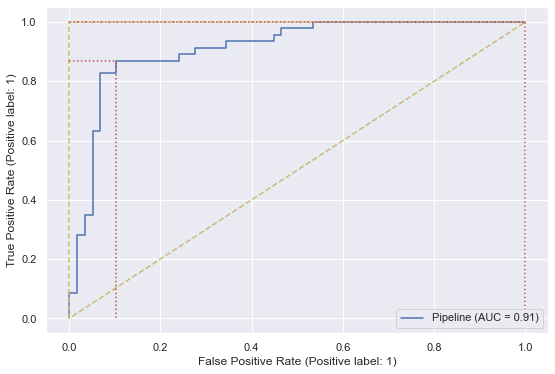

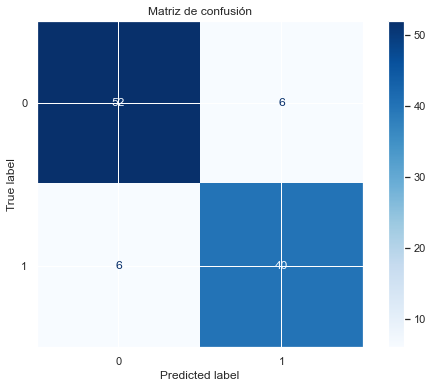

In [ ]:
modelo_svc_gmean = svm.SVC(C=search_gmean.best_params_.get('modelo__C'),
                 gamma=search_gmean.best_params_.get('modelo__gamma'),
                 kernel=search_gmean.best_params_.get('modelo__kernel'),
                 probability=True
                )

pipeline_ = Pipeline(steps=[('processor', columnTransformer),
                                       ('modelo', modelo_svc_gmean)])

modelo_SVM = pipeline_.fit(X_train, y_train)

yhat = modelo_SVM.predict(X_test)

        # Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
svm_curve = RocCurveDisplay.from_estimator(modelo_SVM, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado

print('**********')
cmp = ConfusionMatrixDisplay.from_estimator(modelo_SVM, X_test, y_test, cmap='Blues')
cmp.ax_.set_title('Matriz de confusión')

#**Ejercicio-10.**

## Conclusiones.

Con base a los resultados podemos concluir que el mejor modelo clasificador para el tipo de distribucion de nuestros datos es el de `SVM` para distribucion polinomial (`poly`) debido al los resultados de F1 en comparacion de nuestro modelo base (`DummyClassifier`). Asi mismo mediante GridSearch pudimos encontrar los mejores parametros y el tipo de SVM para nuestro caso, esto de igual manera comparado con metricas provistas por nuestra matriz de confusion y aunado a nuestros graficos de curva de aprendizaje, los cuales nos permitieron descartar modelos propuestos con sobre entranmiento (kernel=`linear`). 
Adicionalmente, gracias a la ayuda del calculo de `gmean` podemos corroborar nuestro grafico ROC, que nos indica el calculo de parametros sobre el umbral para la tasa de verdaderos positivos contra la tasa de verdaderos negativos. Asi mismo, gracias al mismo (grafico ROC) podemos tener una mejor percepcion y posterior calculo de AUC la cual nos indica la taza de cambio del umbra conforme crece el numero de elementos. Que para nuestro modelo seleccionable es aceptable debido a que el AUC es igual `0.91` lo cual nos indica una conversion para la Tasa de Verdaderos Positivos 'estable' para la prediccion de nuevos parametros.

###**Fin de la Actividad de la semana 8.**